In [196]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from decimal import Decimal

In [198]:
path = kagglehub.dataset_download("atharvasoundankar/chocolate-sales")
csv_path = os.path.join(path, "Chocolate Sales.csv")
chocolate_df = pd.read_csv(csv_path)

In [199]:
chocolate_df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [202]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [204]:
chocolate_df['Amount'] = chocolate_df['Amount'].map(lambda x: x[1:].replace(',', '').strip()).astype('float64')
chocolate_df['Date']=pd.to_datetime(chocolate_df['Date'], format="%d-%b-%y")

In [206]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [208]:
chocolate_df['Sales Person'].value_counts()

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Oby Sorrel             49
Ches Bonnell           48
Karlen McCaffrey       47
Gigi Bohling           47
Curtice Advani         46
Kaine Padly            45
Madelene Upcott        45
Marney O'Breen         45
Barr Faughny           43
Jehu Rudeforth         43
Roddy Speechley        43
Gunar Cockshoot        43
Mallorie Waber         41
Jan Morforth           39
Andria Kimpton         39
Husein Augar           38
Dotty Strutley         36
Wilone O'Kielt         34
Rafaelita Blaksland    34
Camilla Castle         32
Name: count, dtype: int64

In [210]:
chocolate_df['Country'].value_counts()

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64

In [212]:
chocolate_df['Product'].value_counts()

Product
50% Dark Bites          60
Eclairs                 60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
After Nines             50
85% Dark Bars           50
Fruit & Nut Bars        50
Milk Bars               49
Peanut Butter Cubes     49
99% Dark & Pure         49
Almond Choco            48
Raspberry Choco         48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64

In [214]:
chocolate_df['Sales Person'] = chocolate_df['Sales Person'].astype('category')
chocolate_df['Country'] = chocolate_df['Country'].astype('category')
chocolate_df['Product'] = chocolate_df['Product'].astype('category')

In [216]:
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   category      
 1   Country        1094 non-null   category      
 2   Product        1094 non-null   category      
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(1)
memory usage: 30.6 KB


In [278]:
sperson_gbamount = (chocolate_df.groupby('Sales Person', observed=True)['Amount'].sum().sort_values(ascending=False))
sperson_gbamount.index = sperson_gbamount.index.astype(str)
sperson_gbcoxes = (chocolate_df.groupby('Sales Person', observed=True)['Boxes Shipped'].sum().sort_values(ascending=False))
sperson_gbcoxes.index = sperson_gbcoxes.index.astype(str)

In [280]:
sperson_gbamount.head()

Sales Person
Ches Bonnell       320901.0
Oby Sorrel         316645.0
Madelene Upcott    316099.0
Brien Boise        312816.0
Kelci Walkden      311710.0
Name: Amount, dtype: float64

In [282]:
sperson_gbcoxes.head()

Sales Person
Karlen McCaffrey       9658
Beverie Moffet         9214
Dennison Crosswaite    8767
Kelci Walkden          8702
Oby Sorrel             8608
Name: Boxes Shipped, dtype: int64

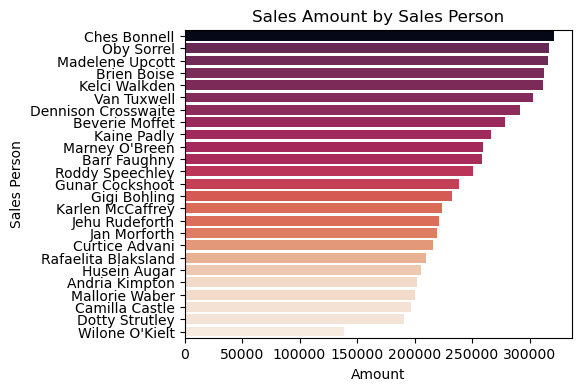

In [298]:
norm = (sperson_gbamount - sperson_gbamount.min()) / (sperson_gbamount.max() - sperson_gbamount.min())
reverse_rocket = list(sns.color_palette("rocket", as_cmap=True)(norm))

plt.figure(figsize=(5, 4))
sns.barplot(x=sperson_gbamount.values, y=sperson_gbamount.index, palette=reverse_rocket, hue=sperson_gbamount.values, legend=False)  
plt.title('Sales Amount by Sales Person')
plt.xlabel('Amount')
plt.ylabel('Sales Person')
plt.show()

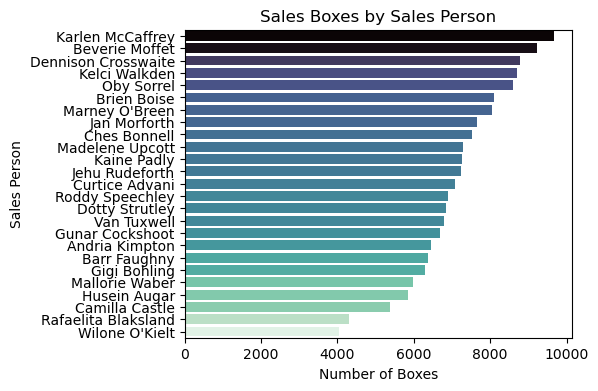

In [296]:
norm = (sperson_gbcoxes - sperson_gbcoxes.min()) / (sperson_gbcoxes.max() - sperson_gbcoxes.min())
reverse_mako = list(sns.color_palette("mako", as_cmap=True)(norm))

plt.figure(figsize=(5, 4))
sns.barplot(x=sperson_gbcoxes.values, y=sperson_gbcoxes.index, palette=reverse_mako, hue=sperson_gbamount.values, legend=False)  
plt.title('Sales Boxes by Sales Person')
plt.xlabel('Number of Boxes')
plt.ylabel('Sales Person')
plt.show()

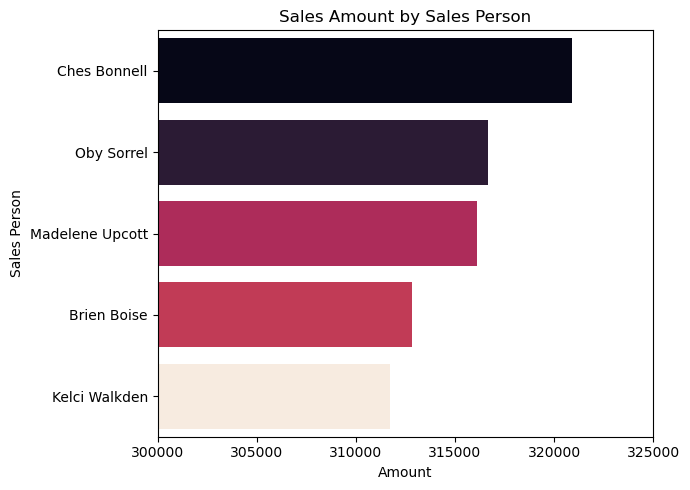

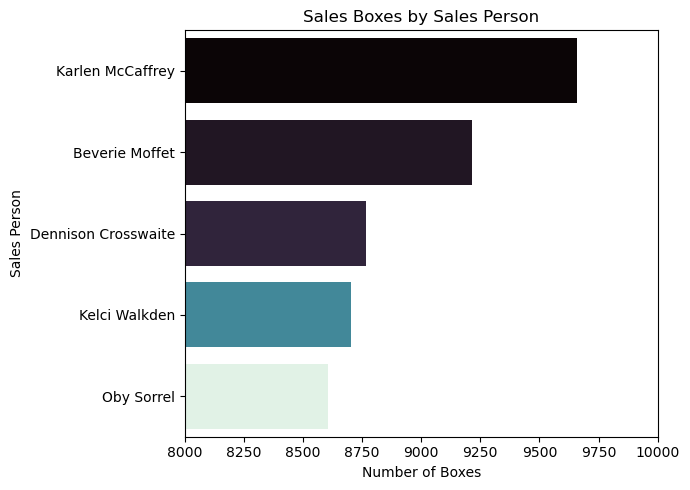

In [364]:
sperson_gbamount_top5 = sperson_gbamount.head()
sperson_gbcoxes_top5 = sperson_gbcoxes.head()

norm = (sperson_gbamount_top5 - sperson_gbamount_top5.min()) / (sperson_gbamount_top5.max() - sperson_gbamount_top5.min())
reverse_rocket = list(sns.color_palette("rocket", as_cmap=True)(norm))

plt.figure(figsize=(7, 5))
sns.barplot(x=sperson_gbamount_top5.values, y=sperson_gbamount_top5.index, palette=reverse_rocket, hue=sperson_gbamount_top5.values, legend=False)

plt.xlim(300000,325000) #change x axis scale to show better difference between persons
plt.title('Sales Amount by Sales Person')
plt.xlabel('Amount')
plt.ylabel('Sales Person')
plt.tight_layout()
plt.show()

norm = (sperson_gbcoxes_top5 - sperson_gbcoxes_top5.min()) / (sperson_gbcoxes_top5.max() - sperson_gbcoxes_top5.min())
reverse_mako = list(sns.color_palette("mako", as_cmap=True)(norm))

plt.figure(figsize=(7, 5))
sns.barplot(x=sperson_gbcoxes_top5.values, y=sperson_gbcoxes_top5.index, palette=reverse_mako, hue=sperson_gbcoxes_top5.values, legend=False)

plt.xlim(8000, 10000) #change x axis scale to show better difference between persons
plt.title('Sales Boxes by Sales Person')
plt.xlabel('Number of Boxes')
plt.ylabel('Sales Person')
plt.tight_layout()
plt.show()

In [300]:
amount_per_box_spdf = pd.DataFrame({'Amount': sperson_gbamount, 'Boxes Shipped': sperson_gbcoxes})
amount_per_box_spdf.head()

,Amount,Boxes Shipped
Sales Person,,
Andria Kimpton,201747.0,6448
Barr Faughny,258713.0,6366
Beverie Moffet,278922.0,9214
Brien Boise,312816.0,8102
Camilla Castle,196616.0,5374


In [396]:
amount_per_box_spdf['Amount_per_box'] = amount_per_box_spdf['Amount']/amount_per_box_spdf['Boxes Shipped']
amount_per_box_spdf.sort_values(by='Amount_per_box',ascending=False,axis=0,inplace=True)
amount_per_box_spdf.head()

,Amount,Boxes Shipped,Amount_per_box
Sales Person,,,
Rafaelita Blaksland,210245.0,4297,48.928322
Van Tuxwell,303149.0,6799,44.587292
Madelene Upcott,316099.0,7279,43.426157
Ches Bonnell,320901.0,7522,42.661659
Barr Faughny,258713.0,6366,40.639805


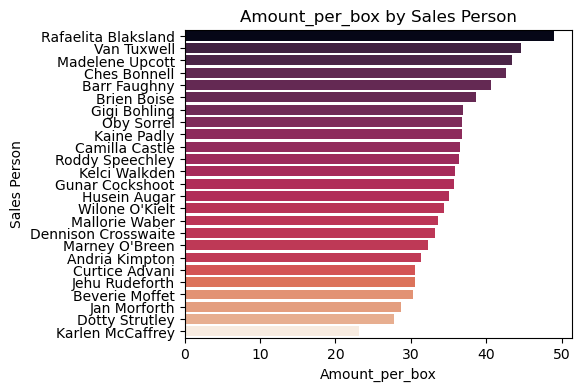

In [408]:
norm = (amount_per_box_spdf['Amount_per_box'] - amount_per_box_spdf['Amount_per_box'].min()) / (amount_per_box_spdf['Amount_per_box'].max() - amount_per_box_spdf['Amount_per_box'].min())
reverse_rocket = list(sns.color_palette("rocket", as_cmap=True)(norm))

plt.figure(figsize=(5, 4))
sns.barplot(x=amount_per_box_spdf['Amount_per_box'], y=amount_per_box_spdf.index, palette=reverse_rocket, 
            hue=amount_per_box_spdf['Amount_per_box'], legend=False)  
plt.title('Amount_per_box by Sales Person')
plt.xlabel('Amount_per_box')
plt.ylabel('Sales Person')
plt.show()

In [410]:
amount_per_transaction_spdf = pd.DataFrame({'Amount': sperson_gbamount, 'Number of transaction': chocolate_df['Sales Person'].value_counts()})
amount_per_transaction_spdf.head()

,Amount,Number of transaction
Sales Person,,
Andria Kimpton,201747.0,39
Barr Faughny,258713.0,43
Beverie Moffet,278922.0,50
Brien Boise,312816.0,53
Camilla Castle,196616.0,32


In [416]:
amount_per_transaction_spdf['Amount_per_transaction'] = amount_per_transaction_spdf['Amount']/amount_per_transaction_spdf['Number of transaction']
amount_per_transaction_spdf.sort_values(by='Amount_per_transaction',ascending=False,axis=0,inplace=True)
amount_per_transaction_spdf.head()

,Amount,Number of transaction,Amount_per_transaction
Sales Person,,,
Madelene Upcott,316099.0,45,7024.422222
Ches Bonnell,320901.0,48,6685.437500
Oby Sorrel,316645.0,49,6462.142857
Rafaelita Blaksland,210245.0,34,6183.676471
Camilla Castle,196616.0,32,6144.250000


In [450]:
norm = (amount_per_transaction_spdf['Amount_per_transaction'].head() - amount_per_transaction_spdf['Amount_per_transaction'].head().min()) / (amount_per_transaction_spdf['Amount_per_transaction'].head().max() - amount_per_transaction_spdf['Amount_per_transaction'].head().min())
reverse_rocket = list(sns.color_palette("rocket", as_cmap=True)(norm))


fig, ax = plt.subplots(figsize=(5, 4))

bars = sns.barplot(x=amount_per_transaction_spdf['Amount_per_transaction'].head(), y=amount_per_transaction_spdf.head().index, palette=reverse_rocket, 
            hue=amount_per_transaction_spdf['Amount_per_transaction'].head(), legend=False) 

plt.xlim(5000,7500)
plt.title('Amount_per_transaction by Sales Person')
plt.xlabel('Amount_per_transaction')
plt.ylabel('Sales Person')

ax.bar_label((for i in range(len(amount_per_transaction_spdf['Amount_per_transaction'].head())): bars.containers[i]), fmt='%.0f', padding=3)


plt.show()

SyntaxError: invalid syntax (1347266296.py, line 15)